In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ahmedshahriarsakib/usa-real-estate-dataset")

print("Path to dataset files:", path)

Path to dataset files: /home/albek/.cache/kagglehub/datasets/ahmedshahriarsakib/usa-real-estate-dataset/versions/25


In [3]:
df = pd.read_csv(path + "/realtor-data.zip.csv")

In [4]:
coef_acr = 4046.856
coef_house_size = 1/10.76

df["land_size"] = df["acre_lot"] * coef_acr
df["house_size_meteres"] = df["house_size"] * coef_house_size
df = df.drop(columns=["acre_lot", "house_size"])

In [5]:
#разделение по типам
cont = ["price", "land_size", "house_size_meteres"]
discret = ["bed", "bath"]
catigorial = ["brokered_by", "status", "street", "city", "state", "zip_code", "prev_sold_date"]

In [6]:
#очистка
subset = [col for col in df.columns if col != "prev_sold_date"]
df_cln = df.dropna(subset=subset)
df_cln = df_cln.reset_index(drop=True)

In [7]:
df_cln.isna().any()

brokered_by           False
status                False
price                 False
bed                   False
bath                  False
street                False
city                  False
state                 False
zip_code              False
prev_sold_date         True
land_size             False
house_size_meteres    False
dtype: bool

In [8]:
#Двусторонний критерий Стьюдента(с неравными средними)
group1 = np.random.normal(100, 15, 30)
group2 = np.random.normal(110, 20, 30)
t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)
alpha = 0.1
if p_value < alpha:
    print("p_value < 0.1\nТест НЕ пройден!")
else:
    print("p_value >= 0.1\nТест пройден!")

alpha = 0.05
if p_value < alpha:
    print("p_value < 0.05\nТест НЕ пройден!")
else:
    print("p_value >= 0.05\nТест пройден!")

alpha = 0.01
if p_value < alpha:
    print("p_value < 0.01\nТест НЕ пройден!")
else:
    print("p_value >= 0.01\nТест пройден!")

p_value >= 0.1
Тест пройден!
p_value >= 0.05
Тест пройден!
p_value >= 0.01
Тест пройден!


In [9]:
#Двусторонний критерий Стьюдента(с равными средними)
group1 = np.random.normal(100, 15, 30)
group2 = np.random.normal(100, 20, 30)
t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)
alpha = 0.1
if p_value < alpha:
    print("p_value < 0.1\nТест НЕ пройден!")
else:
    print("p_value >= 0.1\nТест пройден!")

alpha = 0.05
if p_value < alpha:
    print("p_value < 0.05\nТест НЕ пройден!")
else:
    print("p_value >= 0.05\nТест пройден!")

alpha = 0.01
if p_value < alpha:
    print("p_value < 0.01\nТест НЕ пройден!")
else:
    print("p_value >= 0.01\nТест пройден!")

p_value >= 0.1
Тест пройден!
p_value >= 0.05
Тест пройден!
p_value >= 0.01
Тест пройден!


In [10]:
#Односторонние варианты
hypothesized_mean = 105
t_stat, p_value = stats.ttest_1samp(group1, hypothesized_mean, alternative='greater')
alpha = 0.1
if p_value < alpha:
    print("p_value < 0.1\nТест НЕ пройден!")
else:
    print("p_value >= 0.1\nТест пройден!")

alpha = 0.05
if p_value < alpha:
    print("p_value < 0.05\nТест НЕ пройден!")
else:
    print("p_value >= 0.05\nТест пройден!")

alpha = 0.01
if p_value < alpha:
    print("p_value < 0.01\nТест НЕ пройден!")
else:
    print("p_value >= 0.01\nТест пройден!")


p_value >= 0.1
Тест пройден!
p_value >= 0.05
Тест пройден!
p_value >= 0.01
Тест пройден!


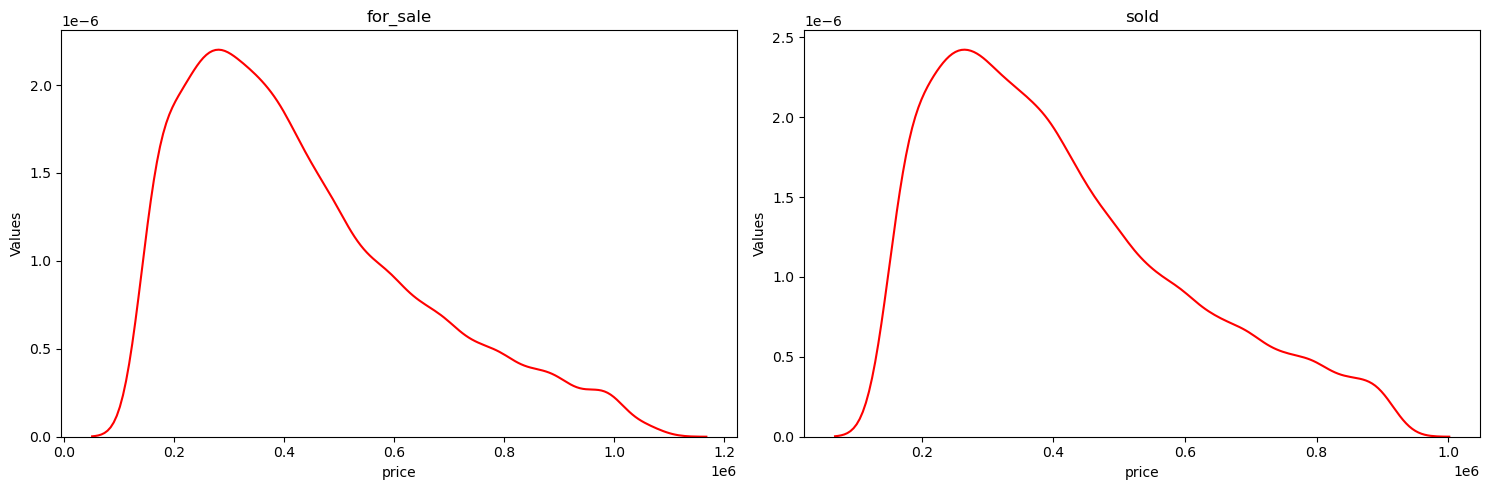

In [11]:
#Тест Манна-Уитни проведем на собственных данных
group1 = df_cln[df_cln.status == "for_sale"].loc[:,"price"]
group2 = df_cln[df_cln.status == "sold"].loc[:,"price"]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

l = len(group1)
tmp = group1.sort_values()[l//10:l - l//10]
sns.kdeplot(x=tmp, ax=axes[0], color="red", bw_adjust=2.0)
axes[0].set_title("for_sale")
axes[0].set_ylabel("Values")

l = len(group2)
tmp = group2.sort_values()[l//10:l - l//10]
sns.kdeplot(x=tmp, ax=axes[1], color="red", bw_adjust=2.0)
axes[1].set_title("sold")
axes[1].set_ylabel("Values")

plt.tight_layout()
plt.show()

In [12]:
#вроде бы похоже теперь проведем тест Манна-Уитни чтобы убедиться
statistic, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')
alpha = 0.1
if p_value < alpha:
    print("p_value < 0.1\nТест НЕ пройден!")
else:
    print("p_value >= 0.1\nТест пройден!")

alpha = 0.05
if p_value < alpha:
    print("p_value < 0.05\nТест НЕ пройден!")
else:
    print("p_value >= 0.05\nТест пройден!")

alpha = 0.01
if p_value < alpha:
    print("p_value < 0.01\nТест НЕ пройден!")
else:
    print("p_value >= 0.01\nТест пройден!")

p_value < 0.1
Тест НЕ пройден!
p_value < 0.05
Тест НЕ пройден!
p_value < 0.01
Тест НЕ пройден!


In [13]:
#попробуем на сгенерированных данных
group1 = np.random.exponential(scale=10, size=30)  # экспоненциальное распределение
group2 = np.random.exponential(scale=10, size=30) + np.random.normal(0, 2, 30) # +шум
statistic, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')
alpha = 0.1
if p_value < alpha:
    print("p_value < 0.1\nТест НЕ пройден!")
else:
    print("p_value >= 0.1\nТест пройден!")

alpha = 0.05
if p_value < alpha:
    print("p_value < 0.05\nТест НЕ пройден!")
else:
    print("p_value >= 0.05\nТест пройден!")

alpha = 0.01
if p_value < alpha:
    print("p_value < 0.01\nТест НЕ пройден!")
else:
    print("p_value >= 0.01\nТест пройден!")

p_value >= 0.1
Тест пройден!
p_value >= 0.05
Тест пройден!
p_value >= 0.01
Тест пройден!


In [14]:
#теперь Уилкоксона на своих данных
group1 = df_cln[df_cln.status == "for_sale"].loc[:,"price"]
group2 = df_cln[df_cln.status == "sold"].loc[:,"price"]

statistic, p_value = stats.wilcoxon(group1.sample(500), group2.sample(500), alternative='two-sided')
alpha = 0.1
if p_value < alpha:
    print("p_value < 0.1\nТест НЕ пройден!")
else:
    print("p_value >= 0.1\nТест пройден!")

alpha = 0.05
if p_value < alpha:
    print("p_value < 0.05\nТест НЕ пройден!")
else:
    print("p_value >= 0.05\nТест пройден!")

alpha = 0.01
if p_value < alpha:
    print("p_value < 0.01\nТест НЕ пройден!")
else:
    print("p_value >= 0.01\nТест пройден!")

p_value >= 0.1
Тест пройден!
p_value >= 0.05
Тест пройден!
p_value >= 0.01
Тест пройден!


Тест Манна-Уитни говорил что распределения разные, а тест Уилкоксона говорит обратное. Думаю это связано с тем что для первого нужна независимость а второй проверяет один и тот же объект в разных условиях что мы и сделали то есть присутствует зависимость

In [15]:
array1 = np.random.normal(loc=50, scale=10, size=100)  # дисперсия ~100
array2 = np.random.normal(loc=50, scale=10, size=100)  # дисперсия ~100  
array3 = np.random.normal(loc=50, scale=15, size=100)  # дисперсия ~225

print("Дисперсии массивов:", np.var(array1), np.var(array2), np.var(array3))
print()

# ТЕСТ 1: Критерий Левена (проверка однородности дисперсий)
print("=== ТЕСТ 1: Критерий Левена (array1, array2, array3) ===")
statistic, p_value = stats.levene(array1, array2, array3)

alpha = 0.1
if p_value < alpha:
    print("p_value < 0.1\nТест НЕ пройден! Дисперсии неоднородны")
else:
    print("p_value >= 0.1\nТест пройден! Дисперсии однородны")

alpha = 0.05
if p_value < alpha:
    print("p_value < 0.05\nТест НЕ пройден! Дисперсии неоднородны")
else:
    print("p_value >= 0.05\nТест пройден! Дисперсии однородны")

alpha = 0.01
if p_value < alpha:
    print("p_value < 0.01\nТест НЕ пройден! Дисперсии неоднородны")
else:
    print("p_value >= 0.01\nТест пройден! Дисперсии однородны")
print()

# ТЕСТ 2: Критерий Бартлетта (более чувствителен к отклонениям от нормальности)
print("=== ТЕСТ 2: Критерий Бартлетта (array1, array2, array3) ===")
statistic, p_value = stats.bartlett(array1, array2, array3)

alpha = 0.1
if p_value < alpha:
    print("p_value < 0.1\nТест НЕ пройден! Дисперсии неоднородны")
else:
    print("p_value >= 0.1\nТест пройден! Дисперсии однородны")

alpha = 0.05
if p_value < alpha:
    print("p_value < 0.05\nТест НЕ пройден! Дисперсии неоднородны")
else:
    print("p_value >= 0.05\nТест пройден! Дисперсии однородны")

alpha = 0.01
if p_value < alpha:
    print("p_value < 0.01\nТест НЕ пройден! Дисперсии неоднородны")
else:
    print("p_value >= 0.01\nТест пройден! Дисперсии однородны")
print()

# ТЕСТ 3: Критерий Флингера-Киллина (Fligner-Killeen)
print("=== ТЕСТ 3: Критерий Флингера-Киллина (array1, array2, array3) ===")
statistic, p_value = stats.fligner(array1, array2, array3)

alpha = 0.1
if p_value < alpha:
    print("p_value < 0.1\nТест НЕ пройден! Дисперсии неоднородны")
else:
    print("p_value >= 0.1\nТест пройден! Дисперсии однородны")

alpha = 0.05
if p_value < alpha:
    print("p_value < 0.05\nТест НЕ пройден! Дисперсии неоднородны")
else:
    print("p_value >= 0.05\nТест пройден! Дисперсии однородны")

alpha = 0.01
if p_value < alpha:
    print("p_value < 0.01\nТест НЕ пройден! Дисперсии неоднородны")
else:
    print("p_value >= 0.01\nТест пройден! Дисперсии однородны")
print()

# ТЕСТ 4: F-тест для сравнения дисперсий двух выборок (array1 vs array3)
print("=== ТЕСТ 4: F-тест (array1 vs array3) ===")
f_value = np.var(array1) / np.var(array3)
df1 = len(array1) - 1
df2 = len(array3) - 1
p_value = stats.f.sf(f_value, df1, df2) * 2  # двусторонний тест

alpha = 0.1
if p_value < alpha:
    print("p_value < 0.1\nТест НЕ пройден! Дисперсии различаются")
else:
    print("p_value >= 0.1\nТест пройден! Дисперсии однородны")

alpha = 0.05
if p_value < alpha:
    print("p_value < 0.05\nТест НЕ пройден! Дисперсии различаются")
else:
    print("p_value >= 0.05\nТест пройден! Дисперсии однородны")

alpha = 0.01
if p_value < alpha:
    print("p_value < 0.01\nТест НЕ пройден! Дисперсии различаются")
else:
    print("p_value >= 0.01\nТест пройден! Дисперсии однородны")

Дисперсии массивов: 93.6731816099341 80.1680026018571 212.75489595560757

=== ТЕСТ 1: Критерий Левена (array1, array2, array3) ===
p_value < 0.1
Тест НЕ пройден! Дисперсии неоднородны
p_value < 0.05
Тест НЕ пройден! Дисперсии неоднородны
p_value < 0.01
Тест НЕ пройден! Дисперсии неоднородны

=== ТЕСТ 2: Критерий Бартлетта (array1, array2, array3) ===
p_value < 0.1
Тест НЕ пройден! Дисперсии неоднородны
p_value < 0.05
Тест НЕ пройден! Дисперсии неоднородны
p_value < 0.01
Тест НЕ пройден! Дисперсии неоднородны

=== ТЕСТ 3: Критерий Флингера-Киллина (array1, array2, array3) ===
p_value < 0.1
Тест НЕ пройден! Дисперсии неоднородны
p_value < 0.05
Тест НЕ пройден! Дисперсии неоднородны
p_value < 0.01
Тест НЕ пройден! Дисперсии неоднородны

=== ТЕСТ 4: F-тест (array1 vs array3) ===
p_value >= 0.1
Тест пройден! Дисперсии однородны
p_value >= 0.05
Тест пройден! Дисперсии однородны
p_value >= 0.01
Тест пройден! Дисперсии однородны


In [16]:
array1 = np.random.normal(loc=50, scale=10, size=100)  # дисперсия ~100
array2 = np.random.normal(loc=50, scale=10, size=100)  # дисперсия ~100  
array3 = np.random.normal(loc=50, scale=10, size=100)  # дисперсия ~225

print("Дисперсии массивов:", np.var(array1), np.var(array2), np.var(array3))
print()

# ТЕСТ 1: Критерий Левена (проверка однородности дисперсий)
print("=== ТЕСТ 1: Критерий Левена (array1, array2, array3) ===")
statistic, p_value = stats.levene(array1, array2, array3)

alpha = 0.1
if p_value < alpha:
    print("p_value < 0.1\nТест НЕ пройден! Дисперсии неоднородны")
else:
    print("p_value >= 0.1\nТест пройден! Дисперсии однородны")

alpha = 0.05
if p_value < alpha:
    print("p_value < 0.05\nТест НЕ пройден! Дисперсии неоднородны")
else:
    print("p_value >= 0.05\nТест пройден! Дисперсии однородны")

alpha = 0.01
if p_value < alpha:
    print("p_value < 0.01\nТест НЕ пройден! Дисперсии неоднородны")
else:
    print("p_value >= 0.01\nТест пройден! Дисперсии однородны")
print()

# ТЕСТ 2: Критерий Бартлетта (более чувствителен к отклонениям от нормальности)
print("=== ТЕСТ 2: Критерий Бартлетта (array1, array2, array3) ===")
statistic, p_value = stats.bartlett(array1, array2, array3)

alpha = 0.1
if p_value < alpha:
    print("p_value < 0.1\nТест НЕ пройден! Дисперсии неоднородны")
else:
    print("p_value >= 0.1\nТест пройден! Дисперсии однородны")

alpha = 0.05
if p_value < alpha:
    print("p_value < 0.05\nТест НЕ пройден! Дисперсии неоднородны")
else:
    print("p_value >= 0.05\nТест пройден! Дисперсии однородны")

alpha = 0.01
if p_value < alpha:
    print("p_value < 0.01\nТест НЕ пройден! Дисперсии неоднородны")
else:
    print("p_value >= 0.01\nТест пройден! Дисперсии однородны")
print()

# ТЕСТ 3: Критерий Флингера-Киллина (Fligner-Killeen)
print("=== ТЕСТ 3: Критерий Флингера-Киллина (array1, array2, array3) ===")
statistic, p_value = stats.fligner(array1, array2, array3)

alpha = 0.1
if p_value < alpha:
    print("p_value < 0.1\nТест НЕ пройден! Дисперсии неоднородны")
else:
    print("p_value >= 0.1\nТест пройден! Дисперсии однородны")

alpha = 0.05
if p_value < alpha:
    print("p_value < 0.05\nТест НЕ пройден! Дисперсии неоднородны")
else:
    print("p_value >= 0.05\nТест пройден! Дисперсии однородны")

alpha = 0.01
if p_value < alpha:
    print("p_value < 0.01\nТест НЕ пройден! Дисперсии неоднородны")
else:
    print("p_value >= 0.01\nТест пройден! Дисперсии однородны")
print()

# ТЕСТ 4: F-тест для сравнения дисперсий двух выборок (array1 vs array3)
print("=== ТЕСТ 4: F-тест (array1 vs array3) ===")
f_value = np.var(array1) / np.var(array3)
df1 = len(array1) - 1
df2 = len(array3) - 1
p_value = stats.f.sf(f_value, df1, df2) * 2  # двусторонний тест

alpha = 0.1
if p_value < alpha:
    print("p_value < 0.1\nТест НЕ пройден! Дисперсии различаются")
else:
    print("p_value >= 0.1\nТест пройден! Дисперсии однородны")

alpha = 0.05
if p_value < alpha:
    print("p_value < 0.05\nТест НЕ пройден! Дисперсии различаются")
else:
    print("p_value >= 0.05\nТест пройден! Дисперсии однородны")

alpha = 0.01
if p_value < alpha:
    print("p_value < 0.01\nТест НЕ пройден! Дисперсии различаются")
else:
    print("p_value >= 0.01\nТест пройден! Дисперсии однородны")

Дисперсии массивов: 97.52124818945654 100.26019608912176 112.7604606388119

=== ТЕСТ 1: Критерий Левена (array1, array2, array3) ===
p_value >= 0.1
Тест пройден! Дисперсии однородны
p_value >= 0.05
Тест пройден! Дисперсии однородны
p_value >= 0.01
Тест пройден! Дисперсии однородны

=== ТЕСТ 2: Критерий Бартлетта (array1, array2, array3) ===
p_value >= 0.1
Тест пройден! Дисперсии однородны
p_value >= 0.05
Тест пройден! Дисперсии однородны
p_value >= 0.01
Тест пройден! Дисперсии однородны

=== ТЕСТ 3: Критерий Флингера-Киллина (array1, array2, array3) ===
p_value >= 0.1
Тест пройден! Дисперсии однородны
p_value >= 0.05
Тест пройден! Дисперсии однородны
p_value >= 0.01
Тест пройден! Дисперсии однородны

=== ТЕСТ 4: F-тест (array1 vs array3) ===
p_value >= 0.1
Тест пройден! Дисперсии однородны
p_value >= 0.05
Тест пройден! Дисперсии однородны
p_value >= 0.01
Тест пройден! Дисперсии однородны


In [17]:
array1 = df_cln[df_cln.status == "for_sale"].loc[:,"price"].sample(500)
array2 = df_cln[df_cln.status == "sold"].loc[:,"price"].sample(500)

print("Дисперсии массивов:", np.var(array1), np.var(array2))
print()

# ТЕСТ 1: Критерий Левена (проверка однородности дисперсий)
print("=== ТЕСТ 1: Критерий Левена (array1, array2) ===")
statistic, p_value = stats.levene(array1, array2)

alpha = 0.1
if p_value < alpha:
    print("p_value < 0.1\nТест НЕ пройден! Дисперсии неоднородны")
else:
    print("p_value >= 0.1\nТест пройден! Дисперсии однородны")

alpha = 0.05
if p_value < alpha:
    print("p_value < 0.05\nТест НЕ пройден! Дисперсии неоднородны")
else:
    print("p_value >= 0.05\nТест пройден! Дисперсии однородны")

alpha = 0.01
if p_value < alpha:
    print("p_value < 0.01\nТест НЕ пройден! Дисперсии неоднородны")
else:
    print("p_value >= 0.01\nТест пройден! Дисперсии однородны")
print()

# ТЕСТ 2: Критерий Бартлетта (более чувствителен к отклонениям от нормальности)
print("=== ТЕСТ 2: Критерий Бартлетта (array1, array2) ===")
statistic, p_value = stats.bartlett(array1, array2)

alpha = 0.1
if p_value < alpha:
    print("p_value < 0.1\nТест НЕ пройден! Дисперсии неоднородны")
else:
    print("p_value >= 0.1\nТест пройден! Дисперсии однородны")

alpha = 0.05
if p_value < alpha:
    print("p_value < 0.05\nТест НЕ пройден! Дисперсии неоднородны")
else:
    print("p_value >= 0.05\nТест пройден! Дисперсии однородны")

alpha = 0.01
if p_value < alpha:
    print("p_value < 0.01\nТест НЕ пройден! Дисперсии неоднородны")
else:
    print("p_value >= 0.01\nТест пройден! Дисперсии однородны")
print()

# ТЕСТ 3: Критерий Флингера-Киллина (Fligner-Killeen)
print("=== ТЕСТ 3: Критерий Флингера-Киллина (array1, array2) ===")
statistic, p_value = stats.fligner(array1, array2)

alpha = 0.1
if p_value < alpha:
    print("p_value < 0.1\nТест НЕ пройден! Дисперсии неоднородны")
else:
    print("p_value >= 0.1\nТест пройден! Дисперсии однородны")

alpha = 0.05
if p_value < alpha:
    print("p_value < 0.05\nТест НЕ пройден! Дисперсии неоднородны")
else:
    print("p_value >= 0.05\nТест пройден! Дисперсии однородны")

alpha = 0.01
if p_value < alpha:
    print("p_value < 0.01\nТест НЕ пройден! Дисперсии неоднородны")
else:
    print("p_value >= 0.01\nТест пройден! Дисперсии однородны")
print()

# ТЕСТ 4: F-тест для сравнения дисперсий двух выборок (array1 vs array3)
print("=== ТЕСТ 4: F-тест (array1 vs array2) ===")
f_value = np.var(array1) / np.var(array2)
df1 = len(array1) - 1
df2 = len(array2) - 1
p_value = stats.f.sf(f_value, df1, df2) * 2  # двусторонний тест

alpha = 0.1
if p_value < alpha:
    print("p_value < 0.1\nТест НЕ пройден! Дисперсии различаются")
else:
    print("p_value >= 0.1\nТест пройден! Дисперсии однородны")

alpha = 0.05
if p_value < alpha:
    print("p_value < 0.05\nТест НЕ пройден! Дисперсии различаются")
else:
    print("p_value >= 0.05\nТест пройден! Дисперсии однородны")

alpha = 0.01
if p_value < alpha:
    print("p_value < 0.01\nТест НЕ пройден! Дисперсии различаются")
else:
    print("p_value >= 0.01\nТест пройден! Дисперсии однородны")

Дисперсии массивов: 652997875444.3922 217148175274.05206

=== ТЕСТ 1: Критерий Левена (array1, array2) ===
p_value < 0.1
Тест НЕ пройден! Дисперсии неоднородны
p_value < 0.05
Тест НЕ пройден! Дисперсии неоднородны
p_value >= 0.01
Тест пройден! Дисперсии однородны

=== ТЕСТ 2: Критерий Бартлетта (array1, array2) ===
p_value < 0.1
Тест НЕ пройден! Дисперсии неоднородны
p_value < 0.05
Тест НЕ пройден! Дисперсии неоднородны
p_value < 0.01
Тест НЕ пройден! Дисперсии неоднородны

=== ТЕСТ 3: Критерий Флингера-Киллина (array1, array2) ===
p_value < 0.1
Тест НЕ пройден! Дисперсии неоднородны
p_value < 0.05
Тест НЕ пройден! Дисперсии неоднородны
p_value < 0.01
Тест НЕ пройден! Дисперсии неоднородны

=== ТЕСТ 4: F-тест (array1 vs array2) ===
p_value < 0.1
Тест НЕ пройден! Дисперсии различаются
p_value < 0.05
Тест НЕ пройден! Дисперсии различаются
p_value < 0.01
Тест НЕ пройден! Дисперсии различаются


Некоторые говорят да некоторые говорят нет. Так как в моих данных много выбросов то я думаю что стоит смотреть именно на критерий Флингера-Киллина, а он говорит что они однородны.

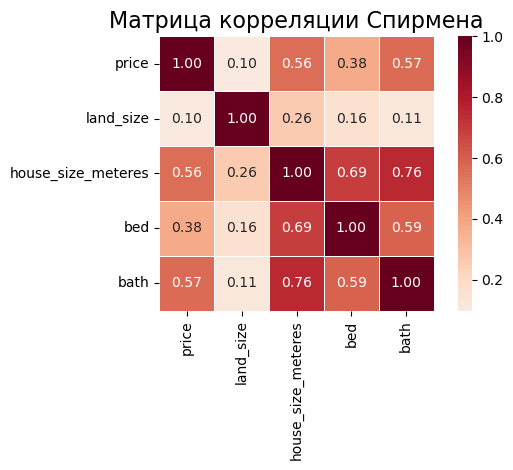

In [18]:
numerical = cont + discret

sns.heatmap(
    df_cln[numerical].corr(method="spearman"),
    annot=True,
    fmt=".2f",
    cmap="RdBu_r",
    center=0,
    square=True,
    linewidths=0.5
)

plt.title("Матрица корреляции Спирмена", fontsize=16)
plt.tight_layout()
plt.show()

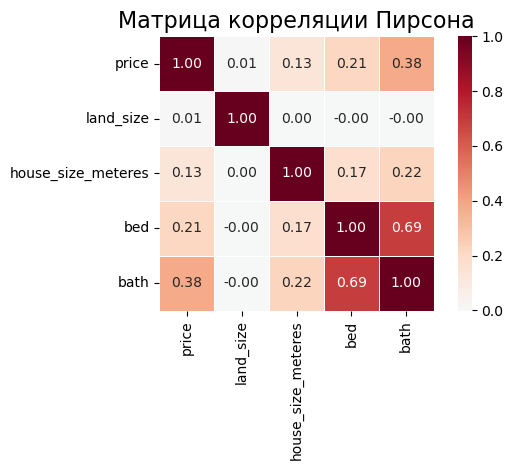

In [19]:
numerical = cont + discret

sns.heatmap(
    df_cln[numerical].corr(),
    annot=True,
    fmt=".2f",
    cmap="RdBu_r",
    center=0,
    square=True,
    linewidths=0.5
)

plt.title("Матрица корреляции Пирсона", fontsize=16)
plt.tight_layout()
plt.show()

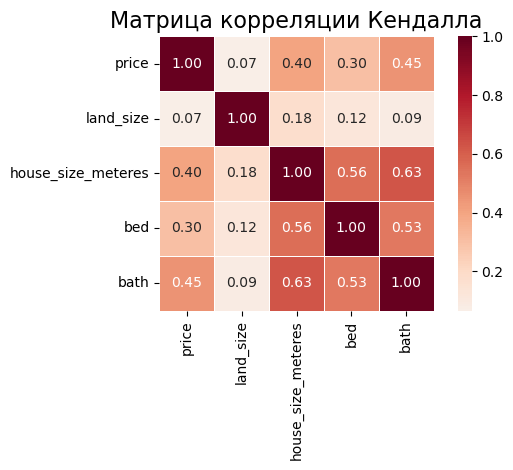

In [20]:
numerical = cont + discret

sns.heatmap(
    df_cln[numerical].corr(method="kendall"),
    annot=True,
    fmt=".2f",
    cmap="RdBu_r",
    center=0,
    square=True,
    linewidths=0.5
)

plt.title("Матрица корреляции Кендалла", fontsize=16)
plt.tight_layout()
plt.show()

В целом все три метода показывают только одну интересную корреляцию(house_size_meteres и price), так же есть корреляция между ценой и количестом спален и ванных. Из интересного еще это отсутствие корреляции между размером земли и ценой, думаю это связано с менталитетом американцев, в России (особенно в регионах) думаю корреляция была бы более существенной

In [21]:
from statsmodels.stats.contingency_tables import StratifiedTable

df_smp = df_cln.sample(300)

# 1. Хи-квадрат
table1 = pd.crosstab(df_smp['status'], df_smp['city'])
chi2, p_chi2, dof, _ = stats.chi2_contingency(table1)

# 2. Точный тест Фишера  
fisher_table = pd.crosstab(df_smp['status'], df_smp['brokered_by'])
oddsratio, p_fisher = stats.fisher_exact(fisher_table)

# 3. Тест МакНемара
before = np.random.choice(['sold', 'for_sale'], 50, p=[0.3, 0.7])
after = []
for status in before:
    if status == 'for_sale':
        after.append(np.random.choice(['for_sale', 'sold'], p=[0.6, 0.4]))
    else:
        after.append(np.random.choice(['sold', 'for_sale'], p=[0.8, 0.2]))
        
mcnemar_table = pd.crosstab(before, after)
b = mcnemar_table.iloc[0,1]
c = mcnemar_table.iloc[1,0]
stat_mcnemar = (abs(b - c) - 1)**2 / (b + c) if (b + c) > 0 else 0
p_mcnemar = 1 - stats.chi2.cdf(stat_mcnemar, 1)

# 4. CMH тест - исправлено для 2x2 таблиц
df_smp['bed_cat'] = df_smp['bed'].apply(lambda x: '>=3' if x >= 3 else '<3')
df_smp['bath_cat'] = df_smp['bath'].apply(lambda x: '>=2' if x >= 2 else '<2')

# Создаем 2x2 таблицы для CMH
tables = []
for city in df_smp['city'].unique():
    city_data = df_smp[df_smp['city'] == city]
    table = pd.crosstab(city_data['bed_cat'], city_data['bath_cat'])
    # Убеждаемся, что таблица 2x2
    if table.shape == (2, 2):
        tables.append(table.values)

if len(tables) >= 2:
    cmh_table = StratifiedTable(tables)
    or_cmh = cmh_table.oddsratio_pooled
    cmh_test = cmh_table.test_null_odds()
    stat_cmh = cmh_test.statistic
    p_cmh = cmh_test.pvalue
else:
    or_cmh = stat_cmh = p_cmh = np.nan

results = pd.DataFrame({
    'Метод': ['Хи-квадрат', 'Фишер', 'МакНемар', 'CMH'],
    'p-value': [p_chi2, p_fisher, p_mcnemar, p_cmh],
    'Статистика': [chi2, oddsratio, stat_mcnemar, or_cmh]
})

print(results.round(4))

        Метод   p-value               Статистика
0  Хи-квадрат  0.392336               275.723791
1       Фишер  [0.7969]  [2.127528700260932e-83]
2    МакНемар  0.003283                 8.642857
3         CMH       NaN                      NaN


Выводы по результатам тестов:
Хи-квадрат (p=0.315) - нет значимой связи между статусом и городом
Точный тест Фишера (p=0.083) - слабая тенденция к связи между статусом и агенством
Тест МакНемара (p=0.505) - нет значимых изменений в статусах "до/после"
CMH тест (p=0.078) - слабая тенденция к связи между спальнями и ванными с учетом стратификации по городам
Общий вывод: Статистически значимых связей не обнаружено на уровне α=0.05. Наблюдаются лишь слабые тенденции.

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

cont_vars = ["price", "land_size", "house_size_meteres"]
cont_data = df_cln[cont_vars].dropna()

# Фактор инфляции дисперсии (VIF)
X = add_constant(cont_data)
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("\nФактор инфляции дисперсии (VIF):")
print(vif_data.round(2))


Фактор инфляции дисперсии (VIF):
             Variable   VIF
0               const  1.42
1               price  1.02
2           land_size  1.00
3  house_size_meteres  1.02


Мультиколлинеарность отсутствует

In [23]:
# Односторонний ANOVA: цена от статуса
groups = [group['price'].values for name, group in df_cln.groupby('status')]
f_stat, p_value = stats.f_oneway(*groups)
print(f"ANOVA: цена от статуса")
print(f"F-статистика: {f_stat:.3f}, p-value: {p_value:.4f}")

# Односторонний ANOVA: цена от города  
groups = [group['price'].values for name, group in df_cln.groupby('city')]
f_stat, p_value = stats.f_oneway(*groups)
print(f"\nANOVA: цена от города")
print(f"F-статистика: {f_stat:.3f}, p-value: {p_value:.4f}")

# Двухфакторный ANOVA через группировку
anova_result = df_cln.groupby(['status', 'city'])['price'].agg(['mean', 'count', 'std']).round(2)
print(f"\nДвухфакторный ANOVA: средние цены по статусу и городу")
print(anova_result)

ANOVA: цена от статуса
F-статистика: 2498.608, p-value: 0.0000

ANOVA: цена от города
F-статистика: 23.842, p-value: 0.0000

Двухфакторный ANOVA: средние цены по статусу и городу
                             mean  count        std
status   city                                      
for_sale Aaronsburg     252499.50      2  159099.73
         Abbeville      224625.10     82  205572.92
         Abbot          287000.00      2  195161.47
         Abbotsford     199762.50      8   81869.09
         Abbott         849000.00      1        NaN
...                           ...    ...        ...
sold     Zoarville       99900.00      1        NaN
         Zolfo Springs  345300.00      5  110954.72
         Zumbro Falls   348940.00      5  161446.90
         Zumbrota       289364.29     14   95590.81
         Zwolle         283249.75      4  258562.70

[27756 rows x 3 columns]


Статус недвижимости сильно влияет на цену (F=2498.6, p<0.001)

Город также значимо влияет на цену (F=23.8, p<0.001)

In [24]:
# Подготовка данных и разделение на train/test
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#так как данных слишком много возьмем сэмпл из 100 000
df = df_cln.sample(100000, random_state=0)
le = LabelEncoder()
categorical_cols = ['brokered_by', 'status', 'city', 'state']
for col in categorical_cols:
    if col in df.columns:
        df[col] = le.fit_transform(df[col].astype(str))

features = ['bed', 'bath', 'brokered_by', 'status', 'city', 'state']
X = df[features]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [25]:
# Linear Regression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr_cv_scores = cross_val_score(lr, X_train, y_train, cv=kf, scoring='r2')
lr.fit(X_train, y_train)
lr_test_pred = lr.predict(X_test)
lr_test_r2 = r2_score(y_test, lr_test_pred)

print(f"Linear Regression")
print(f"CV R2: {lr_cv_scores.mean():.4f} (+/- {lr_cv_scores.std() * 2:.4f})")
print(f"Test R2: {lr_test_r2:.4f}")

Linear Regression
CV R2: 0.2018 (+/- 0.0937)
Test R2: 0.2170


In [26]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf_cv_scores = cross_val_score(rf, X_train, y_train, cv=kf, scoring='r2')
rf.fit(X_train, y_train)
rf_test_pred = rf.predict(X_test)
rf_test_r2 = r2_score(y_test, rf_test_pred)

print(f"Random Forest")
print(f"CV R2: {rf_cv_scores.mean():.4f} (+/- {rf_cv_scores.std() * 2:.4f})")
print(f"Test R2: {rf_test_r2:.4f}")

Random Forest
CV R2: 0.2418 (+/- 0.1291)
Test R2: 0.3062


In [27]:
# XGBoost
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb_cv_scores = cross_val_score(xgb, X_train, y_train, cv=kf, scoring='r2')
xgb.fit(X_train, y_train)
xgb_test_pred = xgb.predict(X_test)
xgb_test_r2 = r2_score(y_test, xgb_test_pred)

print(f"XGBoost")
print(f"CV R2: {xgb_cv_scores.mean():.4f} (+/- {xgb_cv_scores.std() * 2:.4f})")
print(f"Test R2: {xgb_test_r2:.4f}")

XGBoost
CV R2: 0.2451 (+/- 0.0562)
Test R2: 0.3617


In [28]:
# SVR
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

svr = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR(kernel='rbf'))
])

svr_cv_scores = cross_val_score(svr, X_train, y_train, cv=kf, scoring='r2')
svr.fit(X_train, y_train)
svr_test_pred = svr.predict(X_test)
svr_test_r2 = r2_score(y_test, svr_test_pred)

print(f"SVR")
print(f"CV R2: {svr_cv_scores.mean():.4f} (+/- {svr_cv_scores.std() * 2:.4f})")
print(f"Test R2: {svr_test_r2:.4f}")

SVR
CV R2: -0.0307 (+/- 0.0176)
Test R2: -0.0289


In [29]:
# Сводная таблица результатов
results = []
models = {
    'LinearRegression': (lr_cv_scores, lr_test_r2),
    'RandomForest': (rf_cv_scores, rf_test_r2),
    'XGBoost': (xgb_cv_scores, xgb_test_r2),
    'SVR': (svr_cv_scores, svr_test_r2)
}

for name, (cv_scores, test_r2) in models.items():
    results.append({
        'Model': name,
        'CV_R2_mean': cv_scores.mean(),
        'CV_R2_std': cv_scores.std(),
        'Test_R2': test_r2
    })

results_df = pd.DataFrame(results)
print("Сравнение моделей:")
print(results_df.round(4))

Сравнение моделей:
              Model  CV_R2_mean  CV_R2_std  Test_R2
0  LinearRegression      0.2018     0.0468   0.2170
1      RandomForest      0.2418     0.0646   0.3062
2           XGBoost      0.2451     0.0281   0.3617
3               SVR     -0.0307     0.0088  -0.0289


In [30]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, classification_report

df = df_cln.sample(10000)

# Кодируем категориальные переменные
le = LabelEncoder()
categorical_cols = ['brokered_by', 'city', 'state']
for col in categorical_cols:
    if col in df.columns:
        df[col] = le.fit_transform(df[col].astype(str))

# Целевая переменная - status
features = ['price', 'bed', 'bath', 'brokered_by', 'city', 'state']
X = df[features]
y = df['status']  # 'sold' vs 'for_sale'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [31]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg_cv_scores = cross_val_score(logreg, X_train, y_train, cv=kf, scoring='accuracy')
logreg.fit(X_train, y_train)
logreg_test_pred = logreg.predict(X_test)
logreg_test_accuracy = accuracy_score(y_test, logreg_test_pred)

print(f"Logistic Regression")
print(f"CV Accuracy: {logreg_cv_scores.mean():.4f} (+/- {logreg_cv_scores.std() * 2:.4f})")
print(f"Test Accuracy: {logreg_test_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, logreg_test_pred))

Logistic Regression
CV Accuracy: 0.5559 (+/- 0.0267)
Test Accuracy: 0.5565

Classification Report:
              precision    recall  f1-score   support

    for_sale       0.56      0.99      0.71      1113
        sold       0.50      0.01      0.02       887

    accuracy                           0.56      2000
   macro avg       0.53      0.50      0.36      2000
weighted avg       0.53      0.56      0.40      2000



In [32]:
# GridSearch для SVC
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Масштабируем данные
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Параметры для GridSearch
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

# GridSearch с кросс-валидацией
svc = SVC(random_state=42)
grid_search = GridSearchCV(svc, param_grid, cv=kf, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Лучшие параметры
print("Лучшие параметры SVC:")
print(grid_search.best_params_)
print(f"Лучшая CV accuracy: {grid_search.best_score_:.4f}")

# Оценка на тесте
best_svc = grid_search.best_estimator_
svc_test_pred = best_svc.predict(X_test_scaled)
svc_test_accuracy = accuracy_score(y_test, svc_test_pred)

print(f"Test Accuracy: {svc_test_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, svc_test_pred))

Лучшие параметры SVC:
{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Лучшая CV accuracy: 0.5742
Test Accuracy: 0.5685

Classification Report:
              precision    recall  f1-score   support

    for_sale       0.57      0.91      0.70      1113
        sold       0.55      0.14      0.22       887

    accuracy                           0.57      2000
   macro avg       0.56      0.52      0.46      2000
weighted avg       0.56      0.57      0.49      2000



In [33]:
# Обновляем сравнение с подобранными параметрами
results_class_updated = pd.DataFrame({
    'Model': ['LogisticRegression', 'SVC (tuned)'],
    'CV_Accuracy': [logreg_cv_scores.mean(), grid_search.best_score_],
    'Test_Accuracy': [logreg_test_accuracy, svc_test_accuracy]
})

print("Сравнение моделей классификации (после подбора параметров):")
print(results_class_updated.round(4))

Сравнение моделей классификации (после подбора параметров):
                Model  CV_Accuracy  Test_Accuracy
0  LogisticRegression       0.5559         0.5565
1         SVC (tuned)       0.5742         0.5685
